In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

(1, 3, 3, 1)


C:\Users\Affinity\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


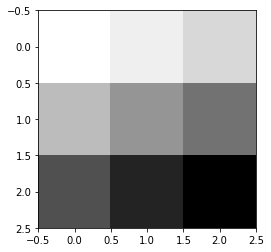

In [21]:
sess = tf.InteractiveSession()
image = np.array(range(1,10),dtype=np.float32).reshape(1,3,3,1) # np.array대신 np.arrange 사용하기
print(image.shape) # 원래 image shape을 알고 있어야 한다.
plt.imshow(image.reshape(3,3),cmap='Greys')
sess.close()

In [15]:
# 간단한 Graph 만들기 (Building the graph)
node_1 = tf.constant(3.0, tf.float32) # 명시적
node_2 = tf.constant(4.0)             # 암묵적
node_3 = tf.add(node_1, node_2)

print(node_1)
print(node_2)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


In [16]:
# Graph 실행
# Session을 생성하는 방법1 - tf.Session()을 이용
sess = tf.Session()
print(sess.run(node_3))
sess.close()

7.0


In [17]:
# Graph 실행
# Session을 생성하는 방법2 - with을 이용
with tf.Session() as sess:
    print(sess.run(node_3))

7.0


In [19]:
# Graph 실행
# Session을 생성하는 방법3 - tf.InterativeSession()을 이용
sess = tf.InteractiveSession()
print(node_3.eval())
sess.close()

7.0


conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


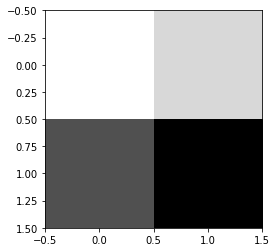

In [23]:
sess = tf.InteractiveSession()

image = np.arange(1, 10, dtype=np.float32).reshape(1, 3, 3, 1)
w_filter = tf.constant(np.ones(4, dtype=np.float32).reshape(2, 2, 1, 1))
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(2,2))
plt.imshow(conv2d_img.reshape(2,2), cmap='Greys')

sess.close()

conv2d_img.shape (1, 3, 3, 1)
[[162. 198. 234.]
 [414. 450. 486.]
 [666. 702. 738.]]


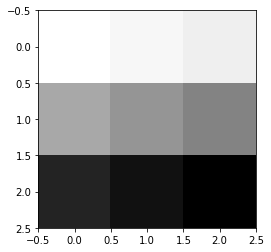

In [25]:
sess = tf.InteractiveSession()

image = np.arange(1, 50, dtype=np.float32).reshape(1, 7, 7, 1)
w_filter = tf.constant(np.ones(9, dtype=np.float32).reshape(3, 3, 1, 1)*2) # tf.constant(np.full((3,3),2,dtype=np.float32).reshape(3,3,1,1)) 해도됨
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 2, 2, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,3))
plt.imshow(conv2d_img.reshape(3,3), cmap='Greys')

sess.close()

In [28]:
a= np.array([[[[1], [2], [3], [4], [5], [6], [7]],
          [[8], [9], [10], [11], [12], [13], [14]],
          [[15], [16], [17], [18], [19], [20], [21]],
          [[22], [23], [24], [25], [26], [27], [28]],
          [[29], [30], [31], [32], [33], [34], [35]],
          [[36], [37], [38], [39], [40], [41], [42]],
          [[43], [44], [45], [46], [47], [48], [49]]]])
a.shape

(1, 7, 7, 1)

conv2d_img.shape (1, 2, 2, 1)
[[162. 216.]
 [540. 594.]]


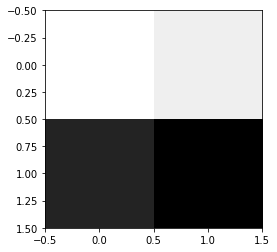

In [30]:
sess = tf.InteractiveSession() # InteractiveSession은 처음과 끝을 설정해놓고 eval()을 통해 실행시키므로 python과 가장 유사한 방법

image = np.arange(1, 50, dtype=np.float32).reshape(1, 7, 7, 1)
w_filter = tf.constant(np.ones(9, dtype=np.float32).reshape(3, 3, 1, 1)*2)
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 3, 3, 1], padding='VALID')
conv2d_img = conv2d.eval() # conv2d를 실행시키는것!
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(2,2))
plt.imshow(conv2d_img.reshape(2,2), cmap='Greys')

sess.close()

conv2d_img.shape (1, 5, 5, 1)
[[4. 6. 6. 6. 4.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [4. 6. 6. 6. 4.]]


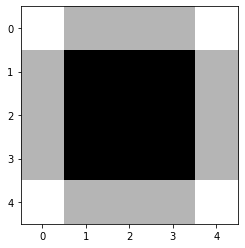

In [31]:
sess = tf.InteractiveSession()

image = np.ones(25, dtype=np.float32).reshape(1, 5, 5, 1)
w_filter = tf.constant(np.ones(9, dtype=np.float32).reshape(3, 3, 1, 1)) 
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(5,5))
plt.imshow(conv2d_img.reshape(5,5), cmap='Greys')

sess.close()

conv2d_img.shape (1, 3, 3, 1)
[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]


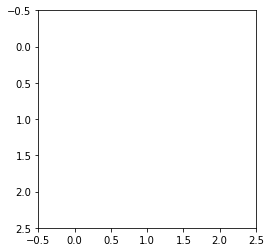

In [33]:
sess = tf.InteractiveSession()

image = np.ones(25, dtype=np.float32).reshape(1, 5, 5, 1)
w_filter = tf.constant(np.ones(9, dtype=np.float32).reshape(3, 3, 1, 1)) 
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,3))
plt.imshow(conv2d_img.reshape(3,3), cmap='Greys')

sess.close()

conv2d_img.shape (1, 3, 3, 1)
[[25. 30. 20.]
 [30. 36. 24.]
 [20. 24. 16.]]


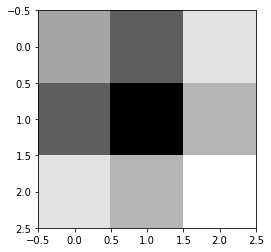

In [35]:
sess = tf.InteractiveSession()

image = np.ones(121, dtype=np.float32).reshape(1, 11, 11, 1)
w_filter = tf.constant(np.ones(36, dtype=np.float32).reshape(6, 6, 1, 1)) 
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 4, 4, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,3))
plt.imshow(conv2d_img.reshape(3,3), cmap='Greys')

sess.close()

In [36]:
sess = tf.InteractiveSession()

image = np.arange(1, 17, dtype=np.float32).reshape(1, 4, 4, 1)
max_pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
avg_pool = tf.nn.avg_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

print(max_pool.eval().shape)
print(max_pool.eval().reshape(2,2))
print(avg_pool.eval().reshape(2,2))

sess.close()

(1, 2, 2, 1)
[[ 6.  8.]
 [14. 16.]]
[[ 3.5  5.5]
 [11.5 13.5]]


In [37]:
sess = tf.InteractiveSession()

image = np.arange(1, 37, dtype=np.float32).reshape(1, 6, 6, 1)
pool_1 = tf.nn.max_pool(image, ksize=[1,5,5,1], strides=[1,4,4,1], padding="VALID")
pool_2 = tf.nn.max_pool(image, ksize=[1,5,5,1], strides=[1,4,4,1], padding="SAME")

print(pool_1.eval().shape)
print(pool_1.eval().reshape(1,1))
print(pool_2.eval().shape)
print(pool_2.eval().reshape(2,2))

sess.close()

(1, 1, 1, 1)
[[29.]]
(1, 2, 2, 1)
[[22. 24.]
 [34. 36.]]


# mnist 데이터 살펴보기

In [38]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # mnist_data라는 폴더에 넣어둠!

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


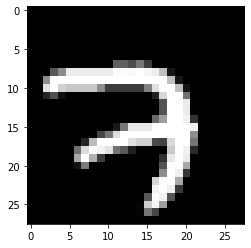

In [39]:
img = mnist.train.images[0].reshape(28, 28)
print(mnist.train.labels[0])
plt.imshow(img, cmap='gray')

필터의 갯수가 들어가면서 부터 swapaxies 코드가 필요하기 시작해졌다.

Tensor("Conv2D_11:0", shape=(1, 14, 14, 5), dtype=float32)


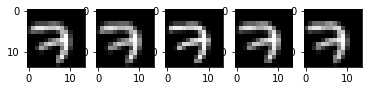

In [41]:
sess = tf.InteractiveSession()

img = img.reshape(1,28,28,1)
w_filter = np.random.random((3,3,1,5)) # 이 차원의 수를 0.0 ~ 1.0 사이에서 무작위로 생성
conv2d = tf.nn.conv2d(img, w_filter, strides=[1,2,2,1], padding="SAME")
print(conv2d)
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap="gray")
    
sess.close()

w_filter에 -0.5를 해서 필터에 음수를 추가하니 그림이 달라지는 것을 확인할 수 있다.

Tensor("Conv2D_14:0", shape=(1, 14, 14, 5), dtype=float32)


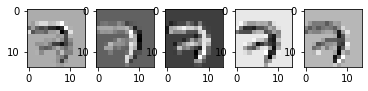

In [44]:
sess = tf.InteractiveSession()

img = img.reshape(1,28,28,1)
w_filter = np.random.random((3,3,1,5))-0.5 # 이 차원의 수를 0.0 ~ 1.0 사이에서 무작위로 생성
conv2d = tf.nn.conv2d(img, w_filter, strides=[1,2,2,1], padding="SAME")
print(conv2d)
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap="gray")
    
sess.close()

# Lena 이미지를 통해 실습해보기

In [56]:
from PIL import Image as lm # pillow 다운받기 # png 다루는 패키지 파일
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

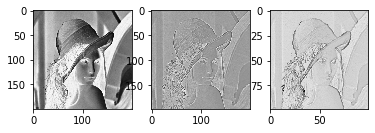

In [77]:
Lena = lm.open('Lena.png') # 이미지 열기
Lena.size # 이미지 크기 출력 # >>>(512, 512)
#Lena.show() # 이미지 보기

Lena = Lena.resize((200, 200)) # 크기를 200X200으로
Lena = Lena.convert('L') # 흑백화면으로
Lena = np.array(Lena, dtype=np.float32) # 행렬로
Lena = Lena.reshape(1, 200, 200, 1) 
Lena.shape #[1, 200, 200, 1]=[batch, ht, wdth, channel수]
K1 = tf.constant([[[[-1.]],[[-1.]],[[-1.]]],
                  [[[-1.]],[[9.]],[[-1.]]],
                  [[[-1.]],[[-1.]],[[-1.]]]])
a1 = tf.nn.conv2d(Lena, K1, strides=[1,1,1,1], padding="VALID")

# <설계 완료>
# 실행하기

sess = tf.Session()
a1 = sess.run(a1) # run을 활용해서 해야함
a1.shape # [1, 198, 198, 1]
a1_img = np.swapaxes(a1, 0, 3) # 이제는 무조건 이 코드를 넣어주기!! pooling 계층을 넣어주면서 이렇게됨??
a1_img.shape # [1, 198, 198, 1]


# 최대값 풀링(2)
h1 = tf.nn.max_pool(a1_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

h1 = sess.run(h1)
h1.shape # [1, 99, 99, 1]=[batch, ht, wdth, channel 수]
plt.subplot(131)
plt.imshow(Lena.reshape(200, 200), cmap="Greys")
plt.subplot(132)
plt.imshow(a1_img.reshape(198, 198), cmap="Greys") # convolution
plt.subplot(133)
plt.imshow(h1.reshape(99, 99), cmap="Greys") # max pooling 값

sess.close()

In [72]:
Lena = lm.open('Lena.png') # 이미지 열기
Lena.size # 이미지 크기 출력 # >>>(512, 512)
#Lena.show() # 이미지 보기

Lena = Lena.resize((200, 200)) # 크기를 200X200으로
Lena = Lena.convert('L') # 흑백화면으로
Lena = np.array(Lena, dtype=np.float32) # 행렬로
Lena = Lena.reshape(1, 200, 200, 1) 
Lena.shape #[1, 200, 200, 1]=[batch, ht, wdth, channel수]

# Blur
K2_1 = tf.constant([[[[1.]],[[1.]],[[1.]]],
                  [[[1.]],[[1.]],[[1.]]],
                  [[[1.]],[[1.]],[[1.]]]])
# Sharpen
K2_2 = tf.constant([[[[0.]],[[-1.]],[[0.]]],
                  [[[-1.]],[[5.]],[[-1.]]],
                  [[[0.]],[[-1.]],[[0.]]]])

# Edge_Detect
K2_3 = tf.constant([[[[0.]],[[-1.]],[[0.]]],
                  [[[-1.]],[[4.]],[[-1.]]],
                  [[[0.]],[[-1.]],[[0.]]]])

# Emboss
K2_4 = tf.constant([[[[-2.]],[[-1.]],[[0.]]],
                  [[[-1.]],[[1.]],[[1.]]],
                  [[[0.]],[[1.]],[[2.]]]])

a2_1 = tf.nn.conv2d(Lena, K2_1, strides=[1,1,1,1], padding="VALID")
a2_2 = tf.nn.conv2d(Lena, K2_2, strides=[1,1,1,1], padding="VALID")
a2_3 = tf.nn.conv2d(Lena, K2_3, strides=[1,1,1,1], padding="VALID")
a2_4 = tf.nn.conv2d(Lena, K2_4, strides=[1,1,1,1], padding="VALID")


sess = tf.Session()
a2_1 = sess.run(a2_1)
a2_2 = sess.run(a2_2)
a2_3 = sess.run(a2_3)
a2_4 = sess.run(a2_4)

a2_1_img = np.swapaxes(a2_1, 0, 3)
a2_2_img = np.swapaxes(a2_2, 0, 3)
a2_3_img = np.swapaxes(a2_3, 0, 3)
a2_4_img = np.swapaxes(a2_4, 0, 3)

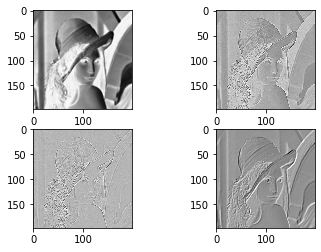

In [73]:
plt.subplot(221)
plt.imshow(a2_1_img.reshape(198, 198), cmap="Greys")
plt.subplot(222)
plt.imshow(a2_2_img.reshape(198, 198), cmap="Greys")
plt.subplot(223)
plt.imshow(a2_3_img.reshape(198, 198), cmap="Greys")
plt.subplot(224)
plt.imshow(a2_4_img.reshape(198, 198), cmap="Greys")

sess.close()

In [83]:
sess = tf.InteractiveSession()

image = np.arange(1, 10, dtype=np.float32).reshape(1,3,3,1)
w_filter = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], dtype=np.float32).reshape(1,3,2,2)
w_filter = np.swapaxes(w_filter, 0, 2)
w_filter = np.swapaxes(w_filter, 1, 3)
conv2d = tf.nn.conv2d(input=image, filter=w_filter, strides=[1, 1, 1, 1], padding="SAME") 
conv2d_img = conv2d.eval()
#SAME이고 stride 1이니 shape대로(3X3으로)결과발생! 이때, channel이 1이고 필터가 3개이므로 총 필터 3개로 나온다!!
"""
print(conv2d_img)
[[[[12. 24. 36.]
   [16. 32. 48.]
   [ 9. 18. 27.]]

  [[24. 48. 72.]
   [28. 56. 84.]
   [15. 30. 45.]]

  [[15. 30. 45.]
   [17. 34. 51.]
   [ 9. 18. 27.]]]]
"""
conv2d_img = np.swapaxes(conv2d_img, 0, 3).reshape(3,3,3)
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img)

sess.close()

conv2d_img.shape (3, 3, 3)
[[[12. 16.  9.]
  [24. 28. 15.]
  [15. 17.  9.]]

 [[24. 32. 18.]
  [48. 56. 30.]
  [30. 34. 18.]]

 [[36. 48. 27.]
  [72. 84. 45.]
  [45. 51. 27.]]]


# MNIST with CNN

In [2]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 5
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784]) # 나중에 변수 만들어줄테니 일단 만들어줘! 이런느낌! (그래프만들어주는느낌?)
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

# 28*28 -> max_pool을 통과하면서 14*14
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # stddev=0.01 : W의 값을 정규화시키겠다는 의미!!
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

# 14*14 -> max_pool을 통과하면서 7*7
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01)) # W1이 [3, 3, 1, 32]이므로 32를 가져옴
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
L2_flat = tf.reshape(L2, [-1, 7*7*64])

# Final FC 7X7X64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7*7*64,10],
                    initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

# full connected 계산하라!!
logits = tf.matmul(L2_flat, W3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("Learning started. It takes sometime.")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys} # placeholder에 집어넣겠다는 이야기
        c, _= sess.run([cost, optimizer], feed_dict=feed_dict) # _이라는 말은 optimizer값은 받지 않겠다는 의미
        avg_cost += c/total_batch
        
    print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
print("Learning Finished")

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)) # argmax : 그 중에 가장 큰거를 1로 하겠다는 의미!!
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples -1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prdiction: ", sess.run(tf.argmax(logits,1), feed_dict={X: mnist.test.images[r:r+1]}))

sess.close()

Learning started. It takes sometime.
Epoch: 0001 cost = 0.345588266
Epoch: 0002 cost = 0.091788193
Epoch: 0003 cost = 0.068251043
Epoch: 0004 cost = 0.056278043
Epoch: 0005 cost = 0.046883360
Learning Finished
Accuracy: 0.9841
Label:  [0]
Prdiction:  [0]


In [3]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 10
batch_size = 100

keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 784]) # 나중에 변수 만들어줄테니 일단 만들어줘! 이런느낌! (그래프만들어주는느낌?)
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

# 28*28 -> max_pool을 통과하면서 14*14
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # stddev=0.01 : W의 값을 정규화시키겠다는 의미!!
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# 14*14 -> max_pool을 통과하면서 7*7
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01)) # W1이 [3, 3, 1, 32]이므로 32를 가져옴
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# 14*14 -> max_pool을 통과하면서 7*7
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01)) # W1이 [3, 3, 1, 32]이므로 32를 가져옴
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding="SAME")
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 7*7*128])

# Final FC 7X7X64 inputs -> 10 outputs
W4 = tf.get_variable("W3", shape=[7*7*128,10],
                    initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

# full connected 계산하라!!
logits = tf.matmul(L3_flat, W4)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


ValueError: Dimensions must be equal, but are 6272 and 3136 for 'MatMul' (op: 'MatMul') with input shapes: [?,6272], [3136,10].

In [7]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("Learning started. It takes sometime.")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys, keep_prob: 0.7} # placeholder에 집어넣겠다는 이야기
        c, _= sess.run([cost, optimizer], feed_dict=feed_dict) # _이라는 말은 optimizer값은 받지 않겠다는 의미
        avg_cost += c/total_batch
        
    print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
print("Learning Finished")

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)) # argmax : 그 중에 가장 큰거를 1로 하겠다는 의미!!
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y: mnist.test.labels, keep_prob:1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples -1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prdiction: ", sess.run(tf.argmax(logits,1), feed_dict={X: mnist.test.images[r:r+1],keep_prob:1}))

sess.close()

Learning started. It takes sometime.
Epoch: 0001 cost = 0.396849156
Epoch: 0002 cost = 0.133431937
Epoch: 0003 cost = 0.098115347
Epoch: 0004 cost = 0.082267410
Epoch: 0005 cost = 0.070424210
Learning Finished
Accuracy: 0.9861
Label:  [9]
Prdiction:  [9]
